#### Τα απαραίτητα αντικείμενα για τους κώδικες

In [1]:
# Necessary Imports for the notebook
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.circuit import Gate

## **Κβαντική Κρυπτογραφία**

<img src="Q-Cryptography.png" width="90%">

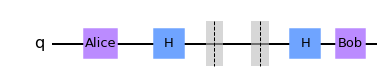

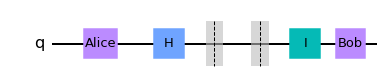

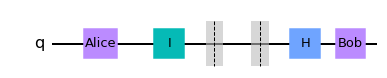

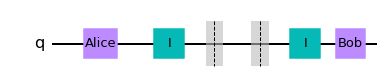

In [83]:
for i in range(2): # Alice's conditional bit
    for j in range(2): # Bob's conditional bit
        qc = QuantumCircuit(1)

        qc.append(Gate("Alice",1,[]), qc.qregs)

        qc.h(0) if i==0 else qc.i(0)
        qc.barrier() # Loooooong distance
        qc.barrier() # Loooooong distance
        qc.h(0) if j==0 else qc.i(0)
        
        qc.append(Gate("Bob",1,[]), qc.qregs)

        # draw the circuit in Qiskit's reading order
        display(qc.draw(output='mpl'))


## **Καταστάσεις Bell** - ζεύγη EPR (Einstein–Podolsky–Rosen)

In [60]:
def bell(qc, x):
    qc.h(0)
    qc.cx(0,1)

    if x==0: return "\n----------Bell state 0: Φ+\n"
    
    if x%2==1: qc.z(1)
    if x==1: return "\n----------Bell state 1: Φ-\n"
    qc.x(1)
    if x==2: return "\n----------Bell state 2: Ψ-\n"
    if x==3: return "\n----------Bell state 3: Ψ-\n"



----------Bell state 0: Φ+



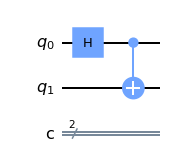

(0.7071067811865476+0j) 0j 0j (0.7071067811865476+0j) 
Counts: {'00': 501, '11': 499}

----------Bell state 1: Φ-



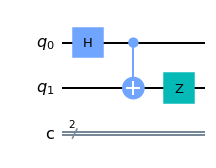

(0.7071067811865476+0j) 0j (-0+0j) (-0.7071067811865476+0j) 
Counts: {'00': 481, '11': 519}

----------Bell state 2: Ψ-



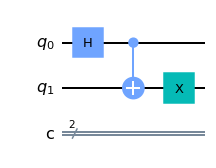

0j (0.7071067811865476+0j) (0.7071067811865476+0j) 0j 
Counts: {'10': 519, '01': 481}

----------Bell state 3: Ψ-



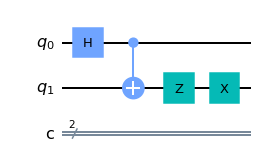

(4.329780281177467e-17+0j) (-0.7071067811865476+0j) (0.7071067811865476+0j) (4.329780281177467e-17+0j) 
Counts: {'01': 502, '10': 498}


In [61]:
for i in range(4):
    qc = QuantumCircuit(2, 2)
    print(bell(qc, i))

    # draw the circuit in Qiskit
    display(qc.draw(output='mpl'))

    # find statevector
    simulator = Aer.get_backend('statevector_simulator')
    statevector = execute(qc, simulator, shots=1).result().get_statevector(qc)
    [print(state, end=" ") for state in statevector]

    # measure states
    qc.measure([0,1],[0,1])
    simulator = Aer.get_backend('qasm_simulator')
    counts = execute(qc, simulator, shots=1000).result().get_counts(qc)
    print("\nCounts:", counts)


## **Υπέρπυκνος Κώδικας**

<img src="Superdense.png" width="60%">

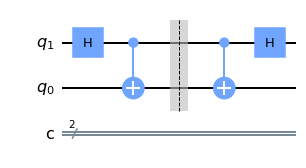

00 ---> {'00': 100}


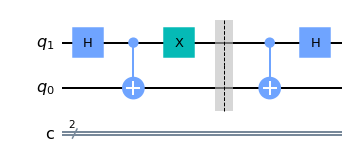

01 ---> {'01': 100}


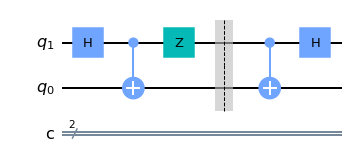

10 ---> {'10': 100}


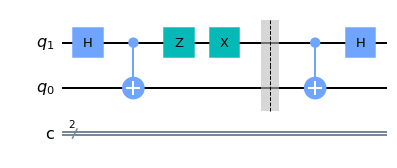

11 ---> {'11': 100}


In [81]:
for pair in ['00','01','10','11']:

    # create a quantum curcuit with two qubits: Alice's and Bob' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # apply h-gate to the Alice's qubit
    qc.h(q[1])

    # apply cx-gate to Alice's qubit, controlled by Bob's qubit
    qc.cx(q[1],q[0])

    # they are separated from each other now

    # if a is 1, then apply z-gate to Alice's qubit
    if pair[0]=='1':
        qc.z(q[1])
    
    # if b is 1, then apply x-gate to Alice's qubit
    if pair[1]=='1':
        qc.x(q[1])
    
    # Alice sends her qubit to Bob
    qc.barrier()
    
    #  apply cx-gate to Alice's qubit, controlled by Bob's qubit
    qc.cx(q[1],q[0])
    
    # apply h-gate to the Alice's qubit
    qc.h(q[1])
    
    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # measure both qubits
    qc.measure(q,c)
    
    # compare the results with pair (a,b)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"--->",counts)

## **Κβαντική Τηλεμεταφορά**

<img src="Teleport.png" width="60%">

the state vector is: [0j, (0.9980267284282714+0j), 0j, (-0+0j), 0j, (-0.06279051952931337+7.6896208758373e-18j), 0j, 0j] 

Bits measured by Alice: 10 {'010': 1}


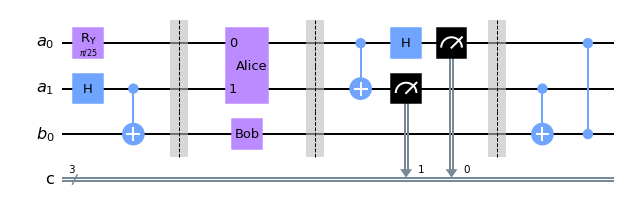

Initially:
 [0.70571147+0.j 0.0443996 +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.70571147+0.j 0.0443996 +0.j] 
Finally:
 [0.        +0.00000000e+00j 0.        +0.00000000e+00j
 0.99802673+0.00000000e+00j 0.        +0.00000000e+00j
 0.        +0.00000000e+00j 0.        -0.00000000e+00j
 0.06279052-7.68962088e-18j 0.        -0.00000000e+00j]


In [2]:
from math import pi, cos, sin
from random import randrange

# quantum circuit with three qubits and three bits
alice =  QuantumRegister(2,"a")
bob =  QuantumRegister(1,"b")
c = ClassicalRegister(3,"c") 
qc = QuantumCircuit(alice,bob, c)

# initialize circuit
theta = 2*pi* randrange(100)/100 # random angel in radians
qc.ry(2*theta, alice[0]) # random state for Alice
qc.h(alice[1])
qc.cx(alice[1],bob)

qc.barrier() # End of initialization

# read the state vector
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator,optimization_level=0,shots=1)
initial_state=job.result().get_statevector(qc)

qc.append(QuantumCircuit(2).to_gate(label="Alice"), alice)
qc.append(QuantumCircuit(1).to_gate(label="Bob"), bob)

qc.barrier()

# Alice's measyrement
qc.cx(alice[0],alice[1])
qc.h(alice[0])
qc.measure(alice[0:2], c[0:2])

# read the state vector
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator, shots=1)
quantum_state = job.result().get_statevector(qc)
print("the state vector is:", [quantum_state[i] for i in range(8)], '\n')

# read the classical register
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator,optimization_level=0,shots=1)
alice_bits = list(job.result().get_counts(qc))[0][1:3]
print("Bits measured by Alice:", alice_bits, job.result().get_counts(qc))

qc.barrier() # Bob's side
qc.cx(alice[1], bob)
qc.cz(alice[0], bob)

# if alice_bits[0]=='1':
#     qc.z(bob)
# if alice_bits[1]=='1':
#     qc.x(bob)

# draw thw circuit
display(qc.draw(output='mpl'))

# read the state vector
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator,optimization_level=0,shots=1)
final_state = job.result().get_statevector(qc)

print("Initially:\n",initial_state, "\nFinally:\n",final_state)

# print("First qubits state:\n\t", initial_state[0]*sqrt(2), initial_state[1]*sqrt(2))
# alice_bias = 2*int(alice_bits[0]) + int(alice_bits[1])
# print(alice_bias)
# print("Bob's qubit's state:\n\t", [final_state[i] for i in range(8)], '\n', final_state[0 + alice_bias], final_state[4 + alice_bias])



the picked angle is 252.0 degrees and 4.39822971502571 radians
a= -0.309 b= -0.951
a*a= 0.095 b*b= 0.905


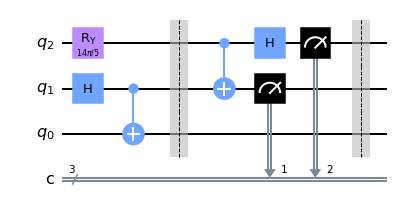

the state vector is
-0.0
-0.0
-0.0
-0.0
-0.30901699437494756
0.9510565162951535
0.0
-0.0

the classical outcome is 10

the new quantum state is |10>(-0.309|0>+0.951|1>)
the new quantum state is |10>(+a|0>-b|1>)


In [9]:
from math import pi, cos, sin
from random import randrange

# quantum circuit with three qubits and three bits
q =  QuantumRegister(3,"q") 
c = ClassicalRegister(3,"c") 
qc = QuantumCircuit(q,c)

# rotate the first qubit by random angle
r = randrange(100)
theta = 2*pi*(r/100) # radians
print("the picked angle is",r*3.6,"degrees and",theta,"radians")
a = cos(theta)
b = sin(theta)
print("a=",round(a,3),"b=",round(b,3))
print("a*a=",round(a**2,3),"b*b=",round(b**2,3))
qc.ry(2*theta,q[2])

# creating an entanglement between q[1] and q[0]
qc.h(q[1])
qc.cx(q[1],q[0])

qc.barrier() # End of initialization

# CNOT operator by Asja on her qubits where q[2] is the control qubit 
qc.cx(q[2],q[1])

# Hadamard operator by Asja on q[2]
qc.h(q[2])

# the measurement done by Asja
qc.measure(q[1:3], c[1:3])

qc.barrier() # End Alice's measurement

# draw thw circuit
display(qc.draw(output='mpl',reverse_bits=True))

# read the state vector
job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
current_quantum_state=job.result().get_statevector(qc)
print("the state vector is")
for i in range(len(current_quantum_state)):
    print(current_quantum_state[i].real)
print()

classical_outcomes = ['00','01','10','11']

for i in range(4):
    if (current_quantum_state[2*i].real != 0) or (current_quantum_state[2*i+1].real != 0):
        print("the classical outcome is",classical_outcomes[i])
        classical_outcome = classical_outcomes[i]
        balvis_state = [ current_quantum_state[2*i].real,current_quantum_state[2*i+1].real ]
print()
        
readable_quantum_state = "|"+classical_outcome+">"
readable_quantum_state += "("+str(round(balvis_state[0],3))+"|0>+"+str(round(balvis_state[1],3))+"|1>)"
print("the new quantum state is",readable_quantum_state)


all_states = ['000','001','010','011','100','101','110','111']

        
balvis_state_str = "|"+classical_outcome+">("
for i in range(len(current_quantum_state)):
    if abs(current_quantum_state[i].real-a)<0.000001: 
        balvis_state_str += "+a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+a)<0.000001:
        balvis_state_str += "-a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real-b)<0.000001: 
        balvis_state_str += "+b|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+b)<0.000001: 
        balvis_state_str += "-b|"+ all_states[i][2]+">"
balvis_state_str += ")"        
print("the new quantum state is",balvis_state_str)